### Mini batch Task
- 다이아몬드의 특성을 회귀분석하여, 예상 가격을 예측한다.

In [1]:
import pandas as pd

d_df = pd.read_csv('./datasets/diamond.csv')
d_df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64
53940,53941,0.71,Premium,E,SI1,60.5,55.0,2756,5.79,5.74,3.49
53941,53942,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43


In [2]:
d_df.drop(labels=['Unnamed: 0'], axis=1, inplace=True)
d_df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64
53940,0.71,Premium,E,SI1,60.5,55.0,2756,5.79,5.74,3.49
53941,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43


In [3]:
d_df.cut.value_counts()

cut
Ideal        21551
Premium      13793
Very Good    12083
Good          4906
Fair          1610
Name: count, dtype: int64

In [4]:
d_df.color.value_counts()

color
G    11292
E     9799
F     9543
H     8304
D     6775
I     5422
J     2808
Name: count, dtype: int64

In [5]:
d_df.clarity.value_counts()

clarity
SI1     13067
VS2     12259
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: count, dtype: int64

In [6]:
d_df.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [7]:
d_df.duplicated().sum()

149

In [8]:
d_df.drop_duplicates(inplace=True)
d_df.reset_index(drop=True, inplace=True)
d_df.duplicated().sum()

0

In [30]:
pre_d_df = d_df.loc[:, ['carat', 'depth', 'table', 'x', 'y', 'z', 'price']]
target = pre_d_df.price
pre_d_df['target'] = target
pre_d_df.drop(labels=['price'], axis=1, inplace=True)
pre_d_df

,carat,depth,table,x,y,z,target
0,0.23,61.5,55.0,3.95,3.98,2.43,326
1,0.21,59.8,61.0,3.89,3.84,2.31,326
2,0.23,56.9,65.0,4.05,4.07,2.31,327
3,0.29,62.4,58.0,4.20,4.23,2.63,334
4,0.31,63.3,58.0,4.34,4.35,2.75,335
...,...,...,...,...,...,...,...
53789,0.72,60.8,57.0,5.75,5.76,3.50,2757
53790,0.72,63.1,55.0,5.69,5.75,3.61,2757
53791,0.70,62.8,60.0,5.66,5.68,3.56,2757
53792,0.86,61.0,58.0,6.15,6.12,3.74,2757


<Axes: >

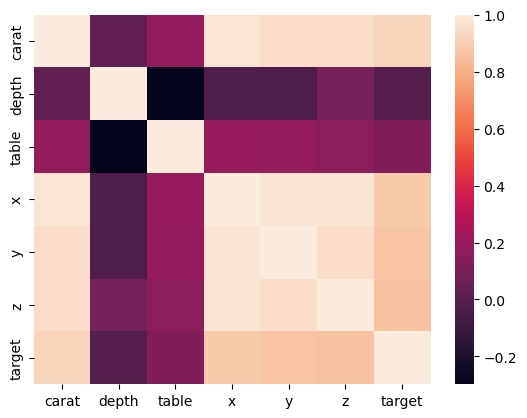

In [31]:
import seaborn as sns

corr = pre_d_df.corr()
sns.heatmap(corr)

### OLS (Ordinary Least Square)
- 최소제곱법, 또는 최소자승법, 최소제곱근사법, 최소자승근사법을 의미하는 기술로서, 가장 근접한 해를 구하는 방식이다.
- 선형 회귀 모델을 평가하는 데 유용한 방법이며, 모델 전체와 모델의 각 feature에 대한 통계적 성능 지표를 사용하여 수행된다.
- 다양한 유형의 통계 모델을 추정하고 통계 테스트를 수행하는 여러 클래스와 기능을 제공한다.
- 관측된 데이터에 선형 방정식을 적용해서 생성되며, 가장 일반적인 방법이다.
- P > |t| (p-value): 해당 독립 변수가 0.05보다 작으면 종속 변수에 영향을 미치는 것이 유의미하다는 것을 뜻한다.
- Durbin-Watson: 보통 1.5에서 2.5 사이라면, 독립으로 판단하고 회귀 모형이 적합하다는 것을 의미한다.
- R<sup>2</sup>값을 유지 또는 개선하는 방향으로만 수행해야 한다.

In [32]:
import statsmodels.api as sm

features, targets = pre_d_df.iloc[:, 0:2], pre_d_df.target

print(sm.OLS(targets, features).fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                 target   R-squared (uncentered):                   0.924
Model:                            OLS   Adj. R-squared (uncentered):              0.924
Method:                 Least Squares   F-statistic:                          3.269e+05
Date:                Fri, 26 Apr 2024   Prob (F-statistic):                        0.00
Time:                        13:09:40   Log-Likelihood:                     -4.7130e+05
No. Observations:               53794   AIC:                                  9.426e+05
Df Residuals:                   53792   BIC:                                  9.426e+05
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

### VIF (Variance Inflation Factor)
- 분산 팽창 요인 수치가 5 또는 10 이상일 경우 다중 공선성의 문제가 있다는 뜻이다.
- 전체적으로 5를 넘어가면 10 이상을 판단한다.
- 다중 공선성(Multicollinearity)이란 회귀 분석에서 독립변수들 간에 강한 상관관계가 나타나는 문제를 뜻한다.

<img src="./images/multicollinearity.png">

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def feature_engineering_VIF(features):
    vif = pd.DataFrame()
    vif['score'] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
    vif['feature'] = features.columns
    return vif

In [34]:
print(feature_engineering_VIF(features))

      score feature
0  3.842618   carat
1  3.842618   depth


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

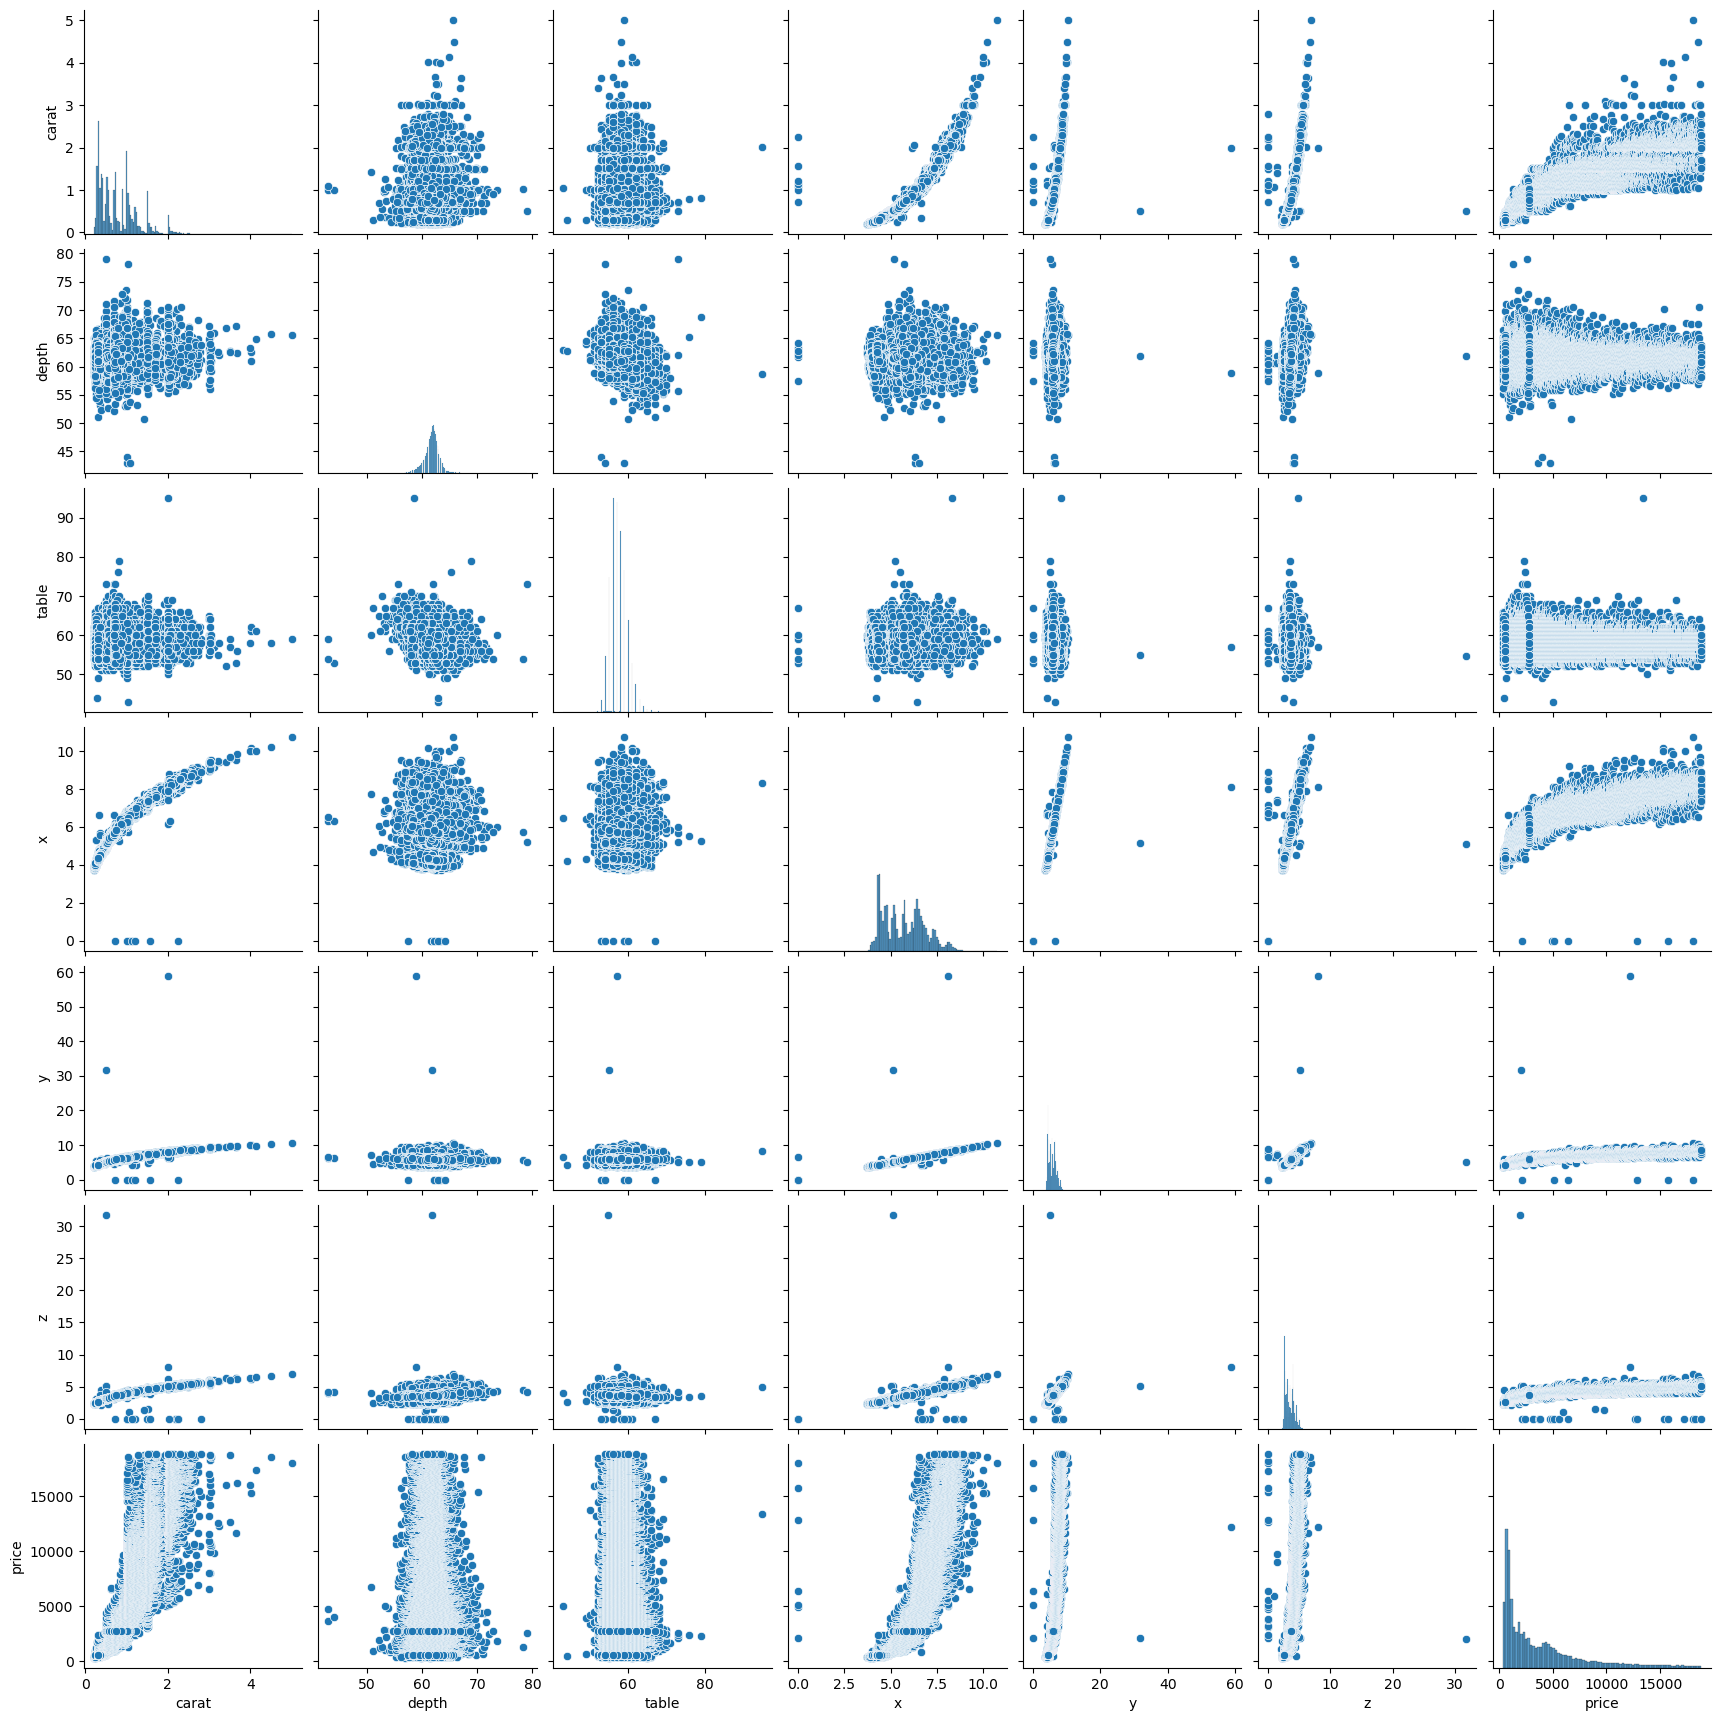

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(d_df[['carat', 'depth', 'table', 'x', 'y', 'z', 'price']])
plt.show()

---
### 아래부터는 원래 실습 풀었던 부분입니다. 

#### cut의 경우 순서가 있는 데이터이므로 레이블 인코딩을, color 및 clarity의 경우 원-핫 인코딩을 진행합니다.

In [9]:
from sklearn.preprocessing import LabelEncoder

pre_d_df = d_df.copy()

encoder = LabelEncoder()
result = encoder.fit_transform(pre_d_df['cut'])
pre_d_df['cut'] = result
pre_d_df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53789,0.72,2,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53790,0.72,1,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53791,0.70,4,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53792,0.86,3,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [10]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

one_hot_encoders = {}
columns = ['color', 'clarity']

for column in columns:
    one_hot_encoder = OneHotEncoder(sparse_output=False)
    result = one_hot_encoder.fit_transform(pre_d_df[[column]])
    pre_d_df = pd.concat([pre_d_df, pd.DataFrame(result, columns=one_hot_encoder.categories_).astype(np.int8)], axis=1)
    one_hot_encoders[column] = one_hot_encoder

pre_d_df

,carat,cut,color,clarity,depth,table,price,x,y,z,...,"(I,)","(J,)","(I1,)","(IF,)","(SI1,)","(SI2,)","(VS1,)","(VS2,)","(VVS1,)","(VVS2,)"
0,0.23,2,E,SI2,61.5,55.0,326,3.95,3.98,2.43,...,0,0,0,0,0,1,0,0,0,0
1,0.21,3,E,SI1,59.8,61.0,326,3.89,3.84,2.31,...,0,0,0,0,1,0,0,0,0,0
2,0.23,1,E,VS1,56.9,65.0,327,4.05,4.07,2.31,...,0,0,0,0,0,0,1,0,0,0
3,0.29,3,I,VS2,62.4,58.0,334,4.20,4.23,2.63,...,1,0,0,0,0,0,0,1,0,0
4,0.31,1,J,SI2,63.3,58.0,335,4.34,4.35,2.75,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53789,0.72,2,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,...,0,0,0,0,1,0,0,0,0,0
53790,0.72,1,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,...,0,0,0,0,1,0,0,0,0,0
53791,0.70,4,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,...,0,0,0,0,1,0,0,0,0,0
53792,0.86,3,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,...,0,0,0,0,0,1,0,0,0,0


In [11]:
pre_d_df.drop(labels=['color', 'clarity'], axis=1, inplace=True)
pre_d_df

,carat,cut,depth,table,price,x,y,z,"(D,)","(E,)",...,"(I,)","(J,)","(I1,)","(IF,)","(SI1,)","(SI2,)","(VS1,)","(VS2,)","(VVS1,)","(VVS2,)"
0,0.23,2,61.5,55.0,326,3.95,3.98,2.43,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0.21,3,59.8,61.0,326,3.89,3.84,2.31,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0.23,1,56.9,65.0,327,4.05,4.07,2.31,0,1,...,0,0,0,0,0,0,1,0,0,0
3,0.29,3,62.4,58.0,334,4.20,4.23,2.63,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0.31,1,63.3,58.0,335,4.34,4.35,2.75,0,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53789,0.72,2,60.8,57.0,2757,5.75,5.76,3.50,1,0,...,0,0,0,0,1,0,0,0,0,0
53790,0.72,1,63.1,55.0,2757,5.69,5.75,3.61,1,0,...,0,0,0,0,1,0,0,0,0,0
53791,0.70,4,62.8,60.0,2757,5.66,5.68,3.56,1,0,...,0,0,0,0,1,0,0,0,0,0
53792,0.86,3,61.0,58.0,2757,6.15,6.12,3.74,0,0,...,0,0,0,0,0,1,0,0,0,0


In [12]:
print(pre_d_df.columns)

Index([  'carat',     'cut',   'depth',   'table',   'price',       'x',
             'y',       'z',    ('D',),    ('E',),    ('F',),    ('G',),
          ('H',),    ('I',),    ('J',),   ('I1',),   ('IF',),  ('SI1',),
        ('SI2',),  ('VS1',),  ('VS2',), ('VVS1',), ('VVS2',)],
      dtype='object')


In [13]:
pre_d_df.columns = ['carat', 'cut', 'depth', 'table', 'price', 'x', 'y', 'z', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'I1', 'IF',
                    'SI1', 'SI2', 'VS1', 'VS2', 'VVS1', 'VVS2']
pre_d_df

,carat,cut,depth,table,price,x,y,z,D,E,...,I,J,I1,IF,SI1,SI2,VS1,VS2,VVS1,VVS2
0,0.23,2,61.5,55.0,326,3.95,3.98,2.43,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0.21,3,59.8,61.0,326,3.89,3.84,2.31,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0.23,1,56.9,65.0,327,4.05,4.07,2.31,0,1,...,0,0,0,0,0,0,1,0,0,0
3,0.29,3,62.4,58.0,334,4.20,4.23,2.63,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0.31,1,63.3,58.0,335,4.34,4.35,2.75,0,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53789,0.72,2,60.8,57.0,2757,5.75,5.76,3.50,1,0,...,0,0,0,0,1,0,0,0,0,0
53790,0.72,1,63.1,55.0,2757,5.69,5.75,3.61,1,0,...,0,0,0,0,1,0,0,0,0,0
53791,0.70,4,62.8,60.0,2757,5.66,5.68,3.56,1,0,...,0,0,0,0,1,0,0,0,0,0
53792,0.86,3,61.0,58.0,2757,6.15,6.12,3.74,0,0,...,0,0,0,0,0,1,0,0,0,0


array([[<Axes: title={'center': 'carat'}>,
        <Axes: title={'center': 'cut'}>,
        <Axes: title={'center': 'depth'}>,
        <Axes: title={'center': 'table'}>,
        <Axes: title={'center': 'price'}>],
       [<Axes: title={'center': 'x'}>, <Axes: title={'center': 'y'}>,
        <Axes: title={'center': 'z'}>, <Axes: title={'center': 'D'}>,
        <Axes: title={'center': 'E'}>],
       [<Axes: title={'center': 'F'}>, <Axes: title={'center': 'G'}>,
        <Axes: title={'center': 'H'}>, <Axes: title={'center': 'I'}>,
        <Axes: title={'center': 'J'}>],
       [<Axes: title={'center': 'I1'}>, <Axes: title={'center': 'IF'}>,
        <Axes: title={'center': 'SI1'}>, <Axes: title={'center': 'SI2'}>,
        <Axes: title={'center': 'VS1'}>],
       [<Axes: title={'center': 'VS2'}>,
        <Axes: title={'center': 'VVS1'}>,
        <Axes: title={'center': 'VVS2'}>, <Axes: >, <Axes: >]],
      dtype=object)

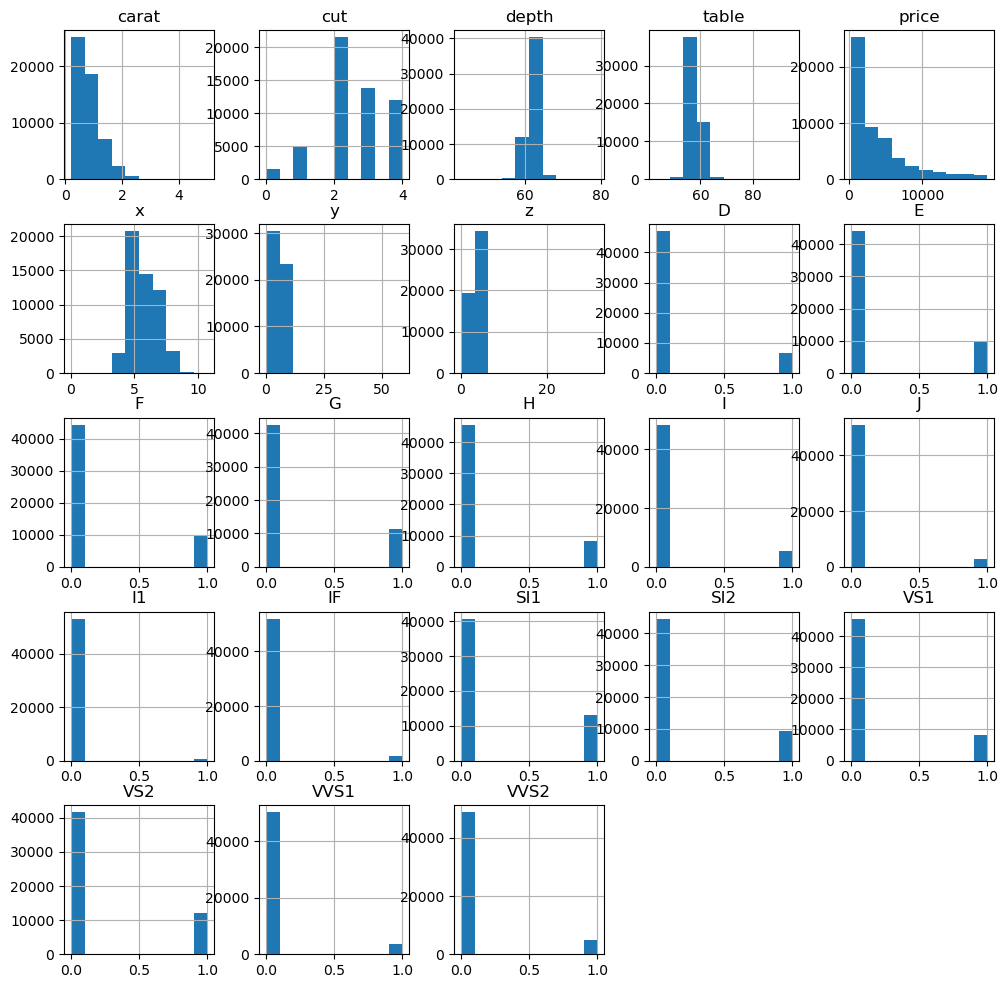

In [14]:
pre_d_df.hist(figsize=(12, 12))

<Axes: >

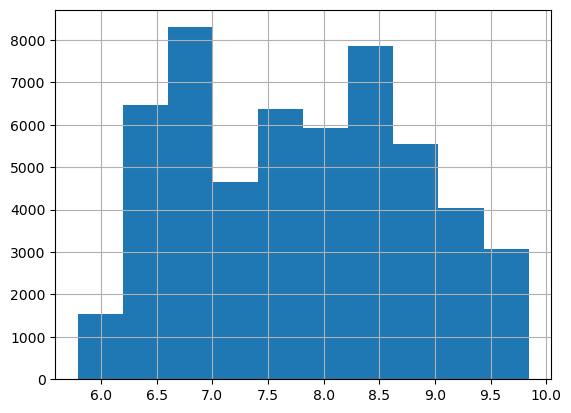

In [15]:
np.log1p(pre_d_df['price']).hist()

array([[<Axes: title={'center': 'carat'}>,
        <Axes: title={'center': 'cut'}>,
        <Axes: title={'center': 'depth'}>,
        <Axes: title={'center': 'table'}>,
        <Axes: title={'center': 'price'}>],
       [<Axes: title={'center': 'x'}>, <Axes: title={'center': 'y'}>,
        <Axes: title={'center': 'z'}>, <Axes: title={'center': 'D'}>,
        <Axes: title={'center': 'E'}>],
       [<Axes: title={'center': 'F'}>, <Axes: title={'center': 'G'}>,
        <Axes: title={'center': 'H'}>, <Axes: title={'center': 'I'}>,
        <Axes: title={'center': 'J'}>],
       [<Axes: title={'center': 'I1'}>, <Axes: title={'center': 'IF'}>,
        <Axes: title={'center': 'SI1'}>, <Axes: title={'center': 'SI2'}>,
        <Axes: title={'center': 'VS1'}>],
       [<Axes: title={'center': 'VS2'}>,
        <Axes: title={'center': 'VVS1'}>,
        <Axes: title={'center': 'VVS2'}>, <Axes: >, <Axes: >]],
      dtype=object)

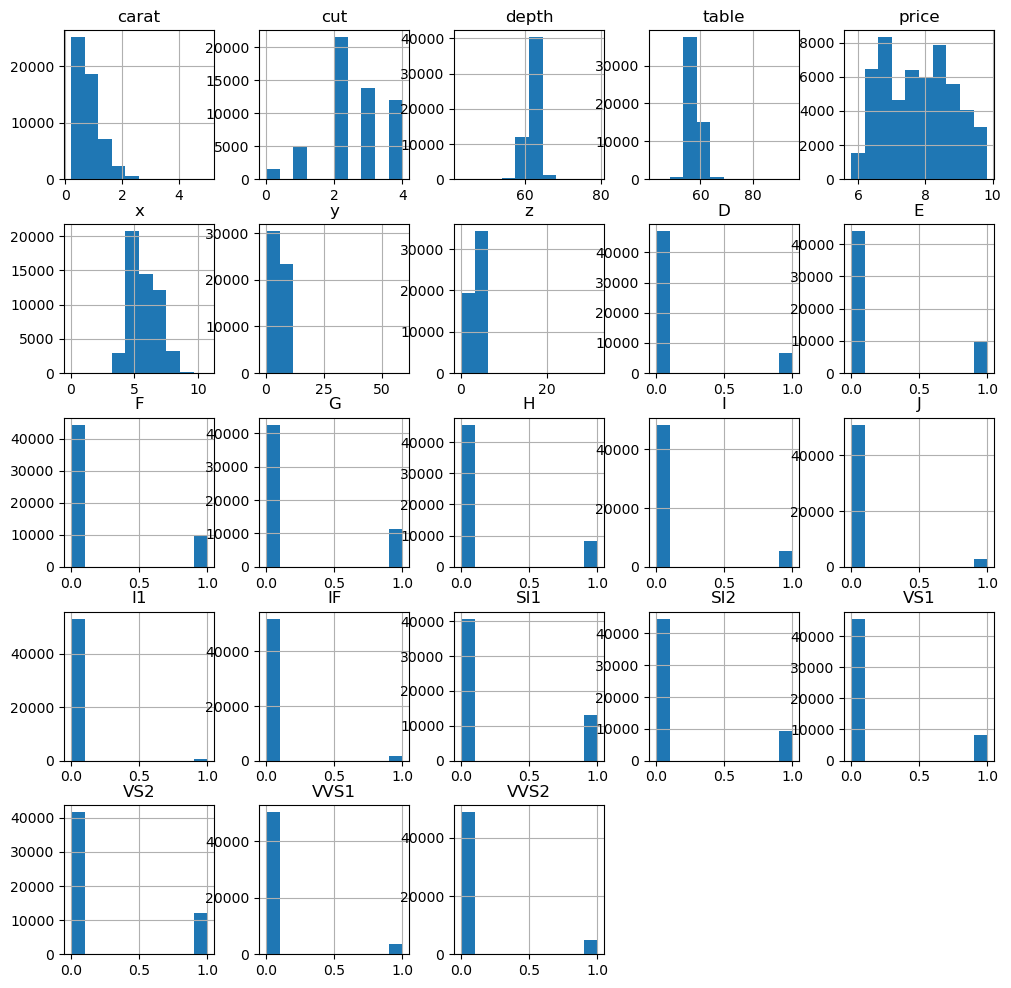

In [16]:
pre_d_df.loc[:, 'price'] = np.log1p(pre_d_df['price'])
pre_d_df.hist(figsize=(12, 12))

In [17]:
corr = pre_d_df.corr()
corr

,carat,cut,depth,table,price,x,y,z,D,E,...,I,J,I1,IF,SI1,SI2,VS1,VS2,VVS1,VVS2
carat,1.000000,0.017785,0.027861,0.181091,0.920418,0.975380,0.951908,0.953542,-0.111643,-0.139196,...,0.160591,0.180773,0.121186,-0.114294,0.062859,0.266458,-0.062818,-0.038390,-0.167533,-0.136930
cut,0.017785,1.000000,-0.193184,0.150366,0.023102,0.022592,0.027805,0.002442,-0.005946,0.015886,...,-0.001997,0.005198,-0.085722,-0.031445,0.019126,0.002811,0.001413,0.011041,-0.003328,0.007083
depth,0.027861,-0.193184,1.000000,-0.297669,0.000764,-0.025348,-0.029389,0.094757,-0.013864,-0.028947,...,0.023060,0.022647,0.082061,-0.030869,0.040715,0.007034,-0.023926,-0.009807,-0.023351,-0.019041
table,0.181091,0.150366,-0.297669,1.000000,0.157512,0.194855,0.183231,0.150270,-0.008500,0.007118,...,0.017521,0.037363,0.044735,-0.078517,0.051883,0.095222,-0.026993,-0.009665,-0.068859,-0.062076
price,0.920418,0.023102,0.000764,0.157512,1.000000,0.958272,0.936325,0.935414,-0.063019,-0.096189,...,0.076925,0.083348,0.027988,-0.069512,0.034070,0.169085,-0.025554,-0.012309,-0.123109,-0.081098
x,0.975380,0.022592,-0.025348,0.194855,0.958272,1.000000,0.974592,0.970686,-0.105697,-0.134327,...,0.145633,0.165204,0.108423,-0.125824,0.079372,0.270185,-0.059716,-0.035077,-0.185235,-0.147125
y,0.951908,0.027805,-0.029389,0.183231,0.936325,0.974592,1.000000,0.951844,-0.103567,-0.130227,...,0.142017,0.161281,0.100774,-0.120641,0.076208,0.262645,-0.056328,-0.035523,-0.179239,-0.141587
z,0.953542,0.002442,0.094757,0.150270,0.935414,0.970686,0.951844,1.000000,-0.104820,-0.132319,...,0.144442,0.164764,0.112083,-0.125093,0.081095,0.262534,-0.058305,-0.035930,-0.182367,-0.144692
D,-0.111643,-0.005946,-0.013864,-0.008500,-0.063019,-0.105697,-0.103567,-0.104820,1.000000,-0.178587,...,-0.126677,-0.088831,-0.024526,-0.047314,0.057291,0.032553,-0.049923,0.020799,-0.046407,-0.015743
E,-0.139196,0.015886,-0.028947,0.007118,-0.096189,-0.134327,-0.130227,-0.132319,-0.178587,1.000000,...,-0.157536,-0.110471,-0.013857,-0.044745,0.006153,0.005282,-0.027043,0.027791,-0.001298,0.011592


In [18]:
corr['price'].sort_values(ascending=False)[1:]

x        0.958272
y        0.936325
z        0.935414
carat    0.920418
SI2      0.169085
table    0.157512
J        0.083348
I        0.076925
H        0.055145
SI1      0.034070
I1       0.027988
cut      0.023102
G        0.001636
depth    0.000764
F       -0.011091
VS2     -0.012309
VS1     -0.025554
D       -0.063019
IF      -0.069512
VVS2    -0.081098
E       -0.096189
VVS1    -0.123109
Name: price, dtype: float64

#### 상관관계가 높은 상위 4개 feature(x, y, z, carat)를 추출하여 회귀분석을 진행합니다.

In [19]:
columns = ['x', 'y', 'z', 'carat', 'price']
pre_d_df = pre_d_df.loc[:, columns]
pre_d_df

,x,y,z,carat,price
0,3.95,3.98,2.43,0.23,5.789960
1,3.89,3.84,2.31,0.21,5.789960
2,4.05,4.07,2.31,0.23,5.793014
3,4.20,4.23,2.63,0.29,5.814131
4,4.34,4.35,2.75,0.31,5.817111
...,...,...,...,...,...
53789,5.75,5.76,3.50,0.72,7.922261
53790,5.69,5.75,3.61,0.72,7.922261
53791,5.66,5.68,3.56,0.70,7.922261
53792,6.15,6.12,3.74,0.86,7.922261


In [20]:
from sklearn.model_selection import train_test_split
import numpy as np
import torch
from torch.nn import Linear
from torch.nn.functional import mse_loss
from torch.optim import SGD
from torch.utils.data import TensorDataset, DataLoader

torch.manual_seed(124)

features, targets = pre_d_df.iloc[:, :-1], pre_d_df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=124)

X_train = torch.FloatTensor(X_train.values)
y_train = torch.FloatTensor(y_train.values).view(-1, 1)

X_test = torch.FloatTensor(X_test.values)
y_test = torch.FloatTensor(y_test.values).view(-1, 1)

td = TensorDataset(X_train, y_train)
dl = DataLoader(td, batch_size=1000, shuffle=True)

l_r = Linear(4, 1)

optimizer = SGD(l_r.parameters(), lr=0.01)

epochs = 1000
for epoch in range(1, epochs + 1):
    for i, samples in enumerate(dl):
        X_train, y_train = samples

        H = l_r(X_train)
        loss = mse_loss(H, y_train)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if epoch % 100 == 0:
            print(f'Epoch: {epoch}/{epochs}, Batch: {i + 1}/{len(dl)}')
            for i, w in enumerate(list(l_r.parameters())[0][0]):
                print(f'W{i + 1}: {np.round(w.item(), 4)}, ', end='')
            print(f'b: {np.round(list(l_r.parameters())[1].item(), 4)}')
            print(f'loss: {np.round(loss.item(), 4)}')

Epoch: 100/1000, Batch: 1/44
W1: 0.8673, W2: 0.0286, W3: 0.6567, W4: -1.0293, b: 1.1418
loss: 0.2399
Epoch: 100/1000, Batch: 2/44
W1: 0.8672, W2: 0.0285, W3: 0.6566, W4: -1.0293, b: 1.1418
loss: 0.0649
Epoch: 100/1000, Batch: 3/44
W1: 0.868, W2: 0.0294, W3: 0.6572, W4: -1.0291, b: 1.1419
loss: 0.0716
Epoch: 100/1000, Batch: 4/44
W1: 0.8659, W2: 0.0273, W3: 0.6559, W4: -1.0295, b: 1.1416
loss: 0.0672
Epoch: 100/1000, Batch: 5/44
W1: 0.8699, W2: 0.0325, W3: 0.6583, W4: -1.0286, b: 1.1426
loss: 0.201
Epoch: 100/1000, Batch: 6/44
W1: 0.8655, W2: 0.0282, W3: 0.6556, W4: -1.0293, b: 1.1418
loss: 0.0689
Epoch: 100/1000, Batch: 7/44
W1: 0.8667, W2: 0.0294, W3: 0.6563, W4: -1.0285, b: 1.1425
loss: 0.2811
Epoch: 100/1000, Batch: 8/44
W1: 0.8652, W2: 0.0242, W3: 0.6551, W4: -1.0288, b: 1.1423
loss: 0.0868
Epoch: 100/1000, Batch: 9/44
W1: 0.8715, W2: 0.0305, W3: 0.659, W4: -1.0279, b: 1.1434
loss: 0.0693
Epoch: 100/1000, Batch: 10/44
W1: 0.8676, W2: 0.0266, W3: 0.6566, W4: -1.0286, b: 1.1428
loss:

In [21]:
from sklearn.metrics import mean_squared_log_error, mean_squared_error
import numpy as np

def get_evaluation(y_test, prediction):
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    MSLE = mean_squared_log_error(y_test, prediction)
    RMSLE = np.sqrt(MSLE)
    print('MSE: {:.4f}, RMSE: {:.4f}, MSLE: {:.4f}, RMSLE: {:.4f}'\
        .format(MSE, RMSE, MSLE, RMSLE))

In [22]:
y_test = y_test.detach().numpy()

H = l_r(X_test)
prediction = H.detach().numpy()

In [23]:
get_evaluation(y_test, prediction)

MSE: 0.0760, RMSE: 0.2756, MSLE: 0.0009, RMSLE: 0.0303


In [24]:
H

tensor([[8.1354],
        [8.6227],
        [6.9773],
        ...,
        [8.5628],
        [6.4974],
        [7.2947]], grad_fn=<AddmmBackward0>)

In [29]:
for h, ans in zip(H, y_test):
    print(f'예측값: {np.round(h.item(), 4)}, 실제 가격: {np.round(ans.item(), 4)}')

예측값: 8.1354, 실제 가격: 8.1391
예측값: 8.6227, 실제 가격: 8.4538
예측값: 6.9773, 실제 가격: 6.9315
예측값: 8.9349, 실제 가격: 8.6637
예측값: 8.7259, 실제 가격: 9.6885
예측값: 7.2861, 실제 가격: 7.2284
예측값: 7.5692, 실제 가격: 7.5893
예측값: 8.655, 실제 가격: 9.1608
예측값: 9.0213, 실제 가격: 9.6582
예측값: 9.1403, 실제 가격: 8.838
예측값: 7.8018, 실제 가격: 7.8387
예측값: 8.4169, 실제 가격: 8.4594
예측값: 7.6989, 실제 가격: 7.7899
예측값: 8.7852, 실제 가격: 9.1857
예측값: 6.9679, 실제 가격: 7.0733
예측값: 6.5894, 실제 가격: 6.8427
예측값: 6.4809, 실제 가격: 6.4568
예측값: 8.5311, 실제 가격: 8.3832
예측값: 9.1977, 실제 가격: 9.4538
예측값: 8.7047, 실제 가격: 8.7521
예측값: 7.8531, 실제 가격: 7.6953
예측값: 6.8346, 실제 가격: 6.628
예측값: 6.3864, 실제 가격: 6.4907
예측값: 8.4553, 실제 가격: 8.4379
예측값: 7.3, 실제 가격: 7.4547
예측값: 7.8027, 실제 가격: 8.1906
예측값: 7.1301, 실제 가격: 7.2123
예측값: 6.2025, 실제 가격: 6.3491
예측값: 7.7092, 실제 가격: 7.9259
예측값: 7.3504, 실제 가격: 7.5033
예측값: 6.4495, 실제 가격: 6.7788
예측값: 8.7298, 실제 가격: 8.8149
예측값: 6.5824, 실제 가격: 6.7032
예측값: 6.5067, 실제 가격: 6.3172
예측값: 9.0592, 실제 가격: 8.9228
예측값: 8.108, 실제 가격: 8.114
예측값: 8.0108, 실제 가격: 7.8721
예측값: 6.45